In [15]:
%cd /content/drive/MyDrive/Kiemtra_AI/Faces/Face

/content/drive/MyDrive/Kiemtra_AI/Faces/Face


In [16]:
#mo hinh CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

In [17]:
#Tạo ra class ImageDataGenerator để chỉnh sửa ảnh
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range =0.2, horizontal_flip = True)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Kiemtra_AI/Faces/Face/Train', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 211 images belonging to 5 classes.


In [19]:
training_set.class_indices

{'Hoang': 0, 'dung': 1, 'hau': 2, 'phong': 3, 'thai': 4}

In [20]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu',padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))


# Duỗi thẳng dữ liệu 
model.add(Flatten())

# Tạo lớp thứ nhất với 256 tín hiệu ra
model.add(Dense(256,activation='relu'))
# Tạo lớp thứ hai với 3 tín hiệu ra
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [21]:
from keras.utils import to_categorical # one hot encoding cho output
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training_set,epochs=30,batch_size=128,verbose=1)

Epoch 1/30
7/7 [==============================] - 9s 601ms/step - loss: 5.1895 - accuracy: 0.2654
Epoch 2/30
7/7 [==============================] - 1s 193ms/step - loss: 0.9766 - accuracy: 0.6825
Epoch 3/30
7/7 [==============================] - 2s 251ms/step - loss: 0.2719 - accuracy: 0.9052
Epoch 4/30
7/7 [==============================] - 2s 226ms/step - loss: 0.0927 - accuracy: 0.9763
Epoch 5/30
7/7 [==============================] - 1s 196ms/step - loss: 0.0976 - accuracy: 0.9573
Epoch 6/30
7/7 [==============================] - 1s 190ms/step - loss: 0.0195 - accuracy: 0.9953
Epoch 7/30
7/7 [==============================] - 1s 189ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 8/30
7/7 [==============================] - 1s 189ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 9/30
7/7 [==============================] - 1s 206ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/30
7/7 [==============================] - 1s 206ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 11/30
7/7 [==

In [22]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np
from matplotlib import pyplot as plt 

In [23]:
# Lưu lại
model.save("Test_face.h5")

from tensorflow.keras.models import load_model
# Tải mô hình 
model_CNN=load_model('Test_face.h5')

1/1 [==============================] - 0s 18ms/step
Phong


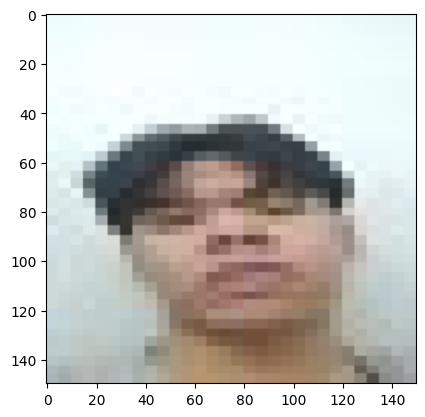

1/1 [==============================] - 0s 21ms/step
Dung


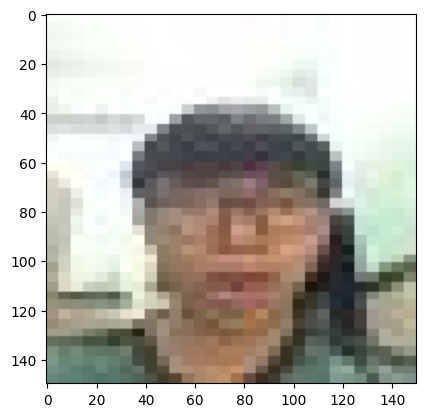

1/1 [==============================] - 0s 20ms/step
Dung


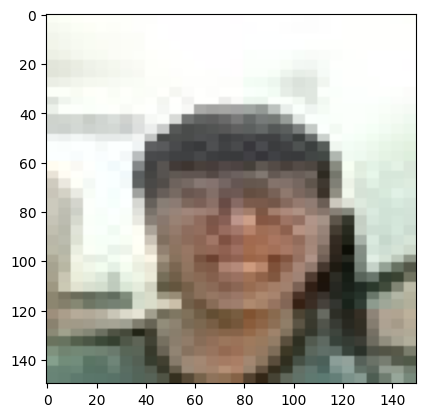

1/1 [==============================] - 0s 18ms/step
Phong


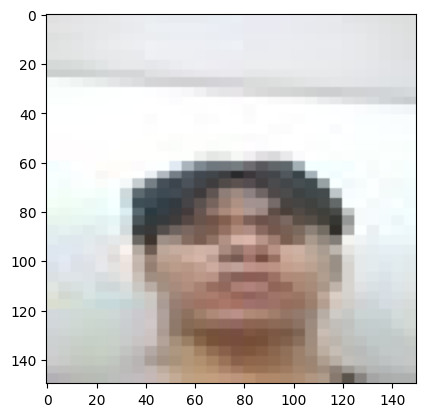

1/1 [==============================] - 0s 22ms/step
Hoang


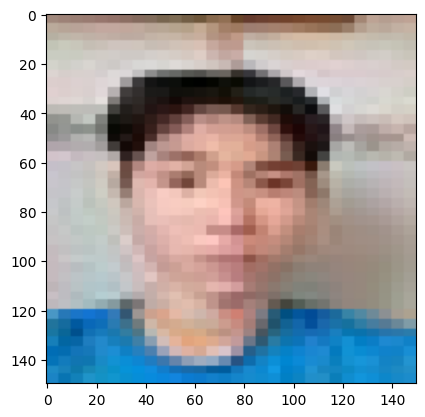

1/1 [==============================] - 0s 18ms/step
Hau


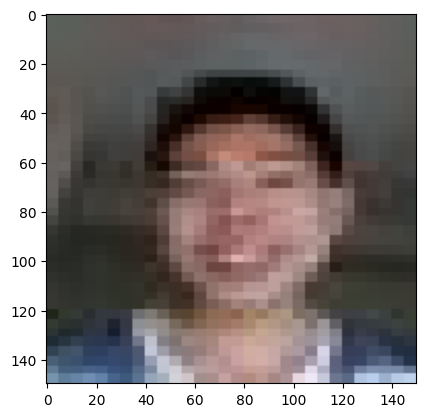

1/1 [==============================] - 0s 18ms/step
Hoang


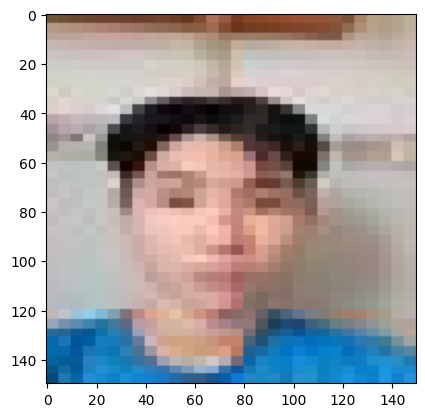

1/1 [==============================] - 0s 20ms/step
Hau


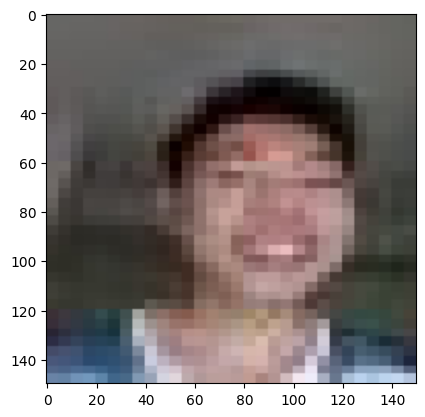

1/1 [==============================] - 0s 18ms/step
Dung


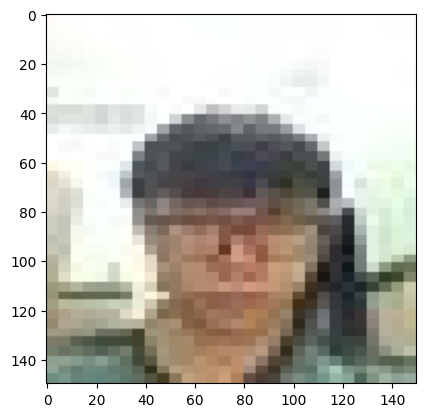

1/1 [==============================] - 0s 28ms/step
Thai


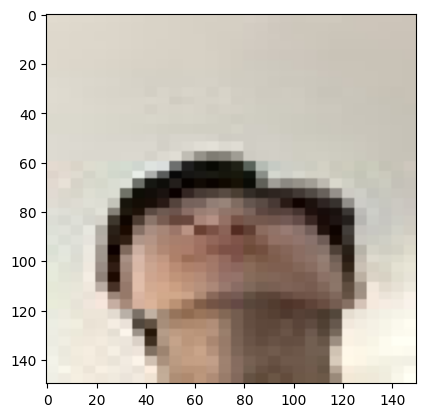

1/1 [==============================] - 0s 26ms/step
Thai


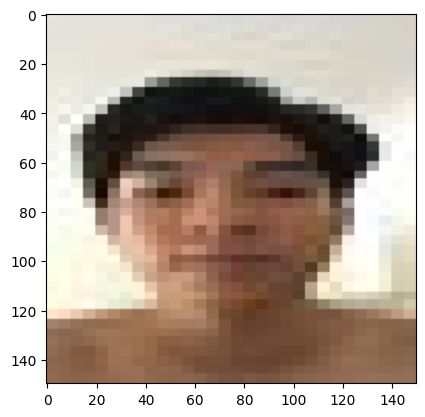

In [25]:
test="/content/drive/MyDrive/Kiemtra_AI/Faces/Face/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['Hoang','Dung','Hau','Phong','Thai']
  
  print(class_name[result])
  plt.show()